In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address', 'Longitude', 'Latitude'], axis=1)
x.head()
colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):

            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [
                    np.linalg.norm(
                        featureset-self.centroids[centroid]
                    ) for centroid in self.centroids
                ]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0
                )
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [
            np.linalg.norm(
                data-self.centroids[centroid]
            ) for centroid in self.centroids
        ]

        classification = distances.index(min(distances))

        return classification

In [3]:
# plt.scatter(x.Latitude , x.Longitude, s =10, c = 'c', marker = "o", alpha = 1)
# plt.show()

In [4]:
x_array = np.array(x)
print(x_array)

[[5.07142857e-03 5.27857143e-02 4.71428571e-03 1.04285714e+00
  7.86428571e+01 7.01428571e+01]
 [5.37500000e-03 4.30000000e-02 1.71875000e-02 1.00625000e+00
  1.01750000e+02 8.88750000e+01]
 [5.22222222e-03 4.15555556e-02 1.55555556e-02 8.66666667e-01
  7.28333333e+01 6.05000000e+01]
 ...
 [3.75000000e-03 4.49583333e-02 5.54166667e-03 6.25000000e-01
  5.21666667e+01 2.64583333e+01]
 [4.41666667e-03 3.17916667e-02 1.41666667e-02 5.79166667e-01
  4.16250000e+01 2.46666667e+01]
 [3.87500000e-03 1.67916667e-02 2.25833333e-02 3.62500000e-01
  2.76666667e+01 1.51250000e+01]]


In [5]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.50892857, 0.7797619 , 0.03713575, 0.92857143, 0.0230858 ,
        0.072153  ],
       [0.546875  , 0.61666667, 0.20778918, 0.8828125 , 0.02978379,
        0.09115112],
       [0.52777778, 0.59259259, 0.18546158, 0.70833333, 0.02140181,
        0.06237323],
       ...,
       [0.34375   , 0.64930556, 0.04845564, 0.40625   , 0.01541124,
        0.02784821],
       [0.42708333, 0.42986111, 0.16645937, 0.34895833, 0.01235556,
        0.0260311 ],
       [0.359375  , 0.17986111, 0.28161277, 0.078125  , 0.00830951,
        0.01635396]])

In [6]:
clf = K_Means()
clf.fit(x_scaled)

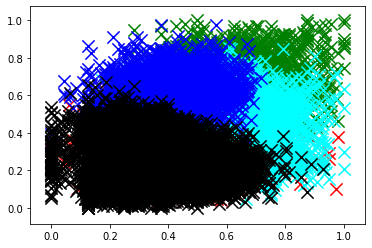

In [7]:
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(
            featureset[0], featureset[1],
            marker='x', color=color, s=150, linewidths=5
        )
plt.show()